In [ ]:
# ===============================
# Adult Income Classification Project
# ===============================

In [ ]:
# ===============================
# Adult Income Classification Project
# ===============================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# -------------------------------
# 2️⃣ Load Dataset from UCI
# ------------------------------

In [3]:
columns = [
    "age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex",
    "capital_gain","capital_loss","hours_per_week",
    "native_country","income"
]

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    names=columns,
    sep=",",
    skipinitialspace=True
)


In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


In [ ]:
# -------------------------------
# 3️⃣ Data Cleaning
# -------------------------------

In [6]:
df.drop(columns=["education"], inplace= True)

In [7]:
df = df.replace("?", np.nan)

In [8]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(23)

In [11]:
df.drop_duplicates(inplace= True)

In [ ]:
# -------------------------------
# 4️⃣ Outlier Handling
# -------------------------------

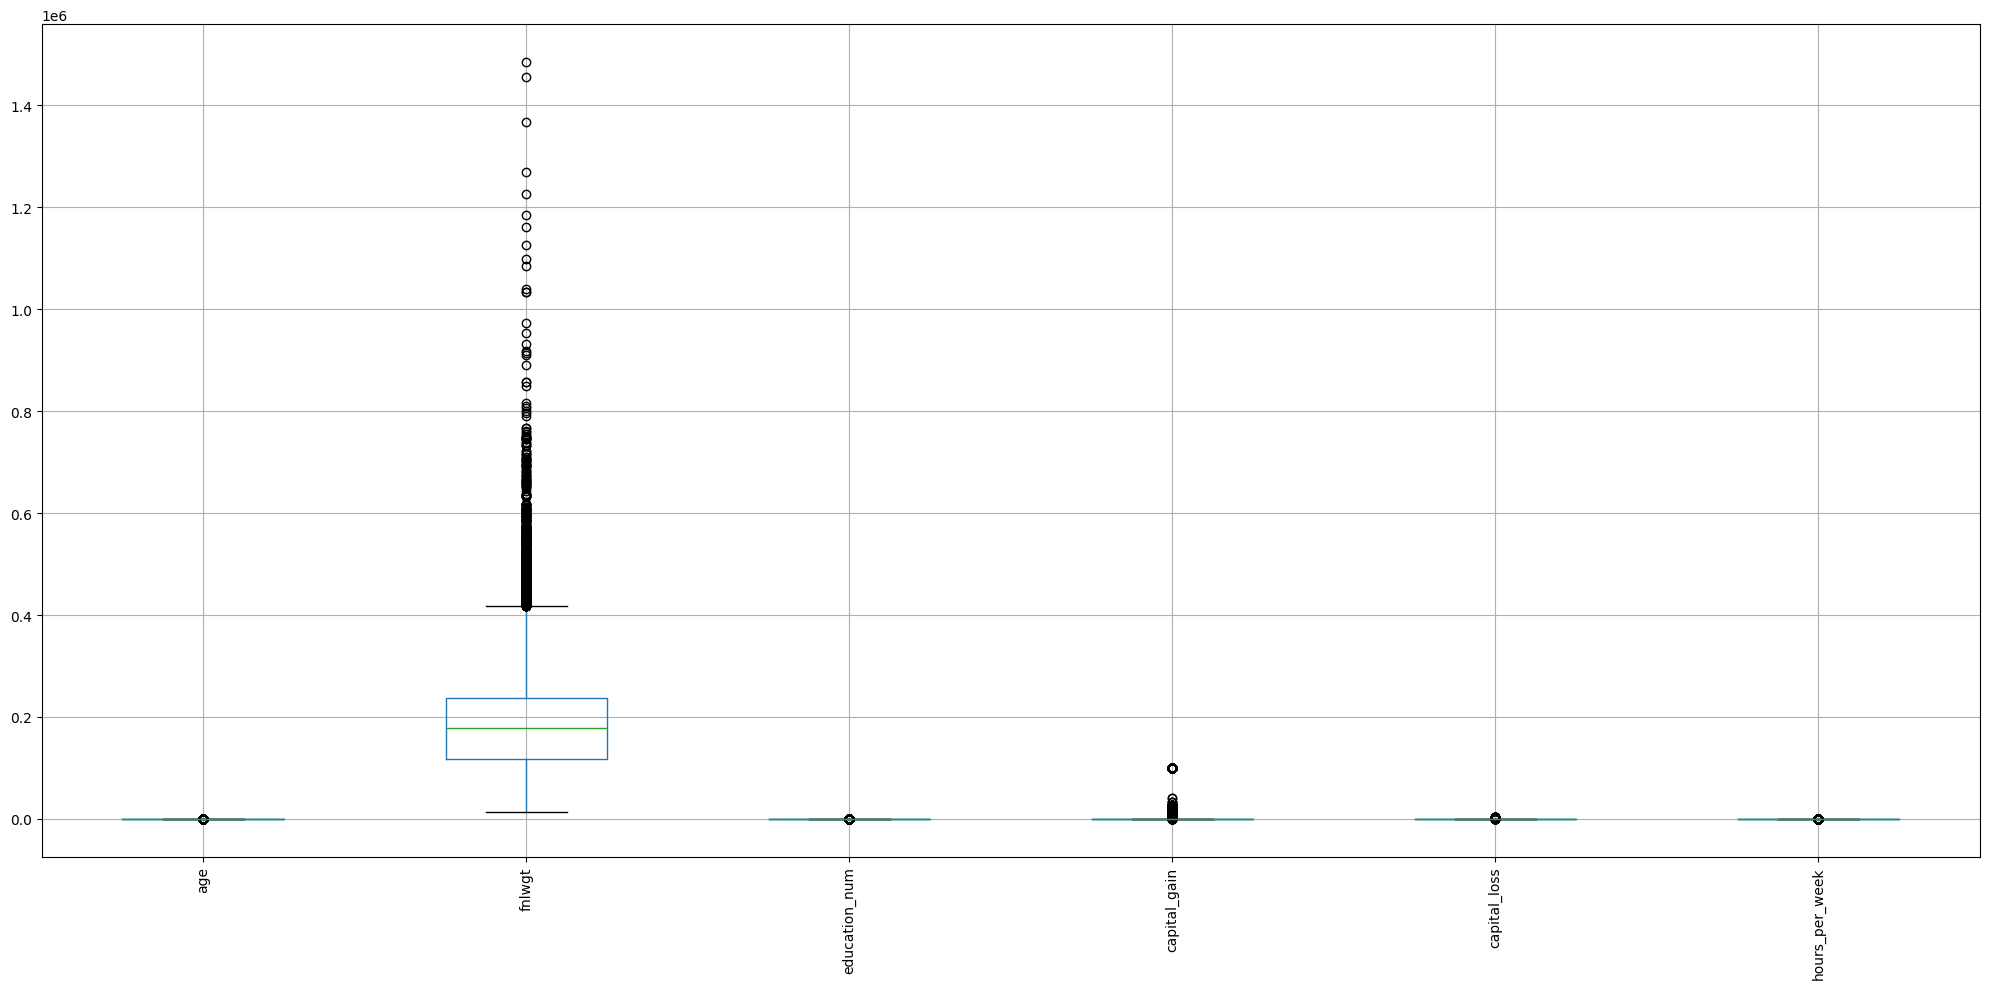

In [12]:
plt.figure(figsize=(20, 10))
df.boxplot(rot=90)
plt.tight_layout()
plt.show()

In [13]:
def clip_outliers_iqr(df, columns):
    df_clipped = df.copy()
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_clipped[col] = np.clip(df[col], lower, upper)
    
    return df_clipped

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df = clip_outliers_iqr(df, num_cols)

In [ ]:
# -------------------------------
# 5️⃣ Encoding
# -------------------------------

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["income"] = le.fit_transform(df["income"])

In [16]:
nominal_cols = ["workclass", "marital_status", "occupation", "relationship", "race", "native_country"]
one_hot_encoder = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

encoded = one_hot_encoder.fit_transform(df[nominal_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=one_hot_encoder.get_feature_names_out(nominal_cols),
    index=df.index
)

df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=nominal_cols, inplace=True)

In [17]:
df.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39.0,77516,13,1,0,0,40.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311,13,1,0,0,32.5,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646,9,1,0,0,40.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721,7,1,0,0,40.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409,13,0,0,0,40.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# -------------------------------
# 6️⃣ Split Data
# -------------------------------

In [18]:
X = df.drop(columns=["income"])
y = df["income"]

In [19]:
y.value_counts()

income
0    22633
1     7506
Name: count, dtype: int64

In [20]:
from sklearn.model_selection  import train_test_split

X_train , X_test  , y_train  , y_test =train_test_split(X , y , test_size=0.2  ,  shuffle=True , random_state= 42 )

In [ ]:
# -------------------------------
# 7️⃣ Handle Class Imbalance using SMOTE
# -------------------------------

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# -------------------------------
# 8️⃣ Scaling
# -------------------------------

In [22]:
num_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# -----------------------------------------
# 9️⃣ Model Training
# -----------------------------------------

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel= "rbf", C = 10, probability=True)
model.fit(X_train, y_train)

In [ ]:
# -----------------------------------------
# 🔟 Threshold Tuning
# -----------------------------------------

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.35

y_pred = (y_proba >= threshold).astype(int)

In [ ]:
# ==============================
# 1️⃣1️⃣ Final Model Evaluation
# ==============================

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[3826  659]
 [ 400 1143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4485
           1       0.63      0.74      0.68      1543

    accuracy                           0.82      6028
   macro avg       0.77      0.80      0.78      6028
weighted avg       0.84      0.82      0.83      6028

ROC-AUC: 0.8757326033129804


<Figure size 600x600 with 0 Axes>

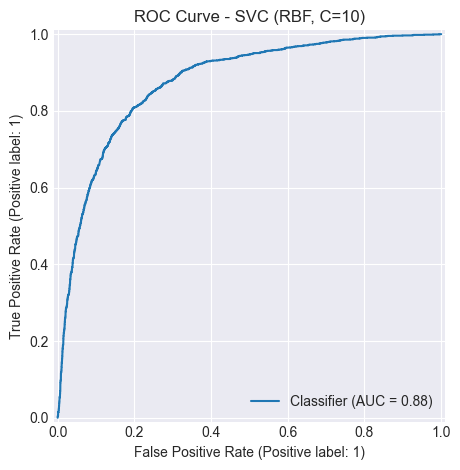

In [55]:
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(6,6))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - SVC (RBF, C=10)")
plt.grid(True)
plt.tight_layout()
plt.show()